In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
df = pd.read_csv("HeartFailure.csv")
df.head()

,ID,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,2,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,3,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,4,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,5,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.shape

(299, 14)

In [4]:
df_cluster = df.iloc[:,1:13]
df_cluster.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [5]:
# Kmeans Clustering
def kmeans(df, n):
    """Function to perform kmeans
    Args:
        df (dataframe): dataframe of points to be clustered
        n (integer): number of clusters
    """
    kmeans = KMeans(n_clusters=n)
    df['cluster'] = kmeans.fit_predict(df)

    centroids = kmeans.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]

    df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1]})
    df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1]})
    
    pca = PCA(2)
    
    df['PC1'] = pca.fit_transform(df)[:,0]
    df['PC2'] = pca.fit_transform(df)[:,1]

 
    plot = sns.scatterplot(data=df,x="PC1",y="PC2",hue=df['cluster'])
    
    return df, plot       

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,cluster,cen_x,cen_y,PC1,PC2
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,0,61.088321,0.423077,1641.969404,-0.145907
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,0,61.088321,0.423077,1.766516,7279.254972
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,0,61.088321,0.423077,-101358.133290,-411.138653
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,0,61.088321,0.423077,-53358.143087,-457.772091
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,59.917954,0.461538,63641.865209,-437.190778


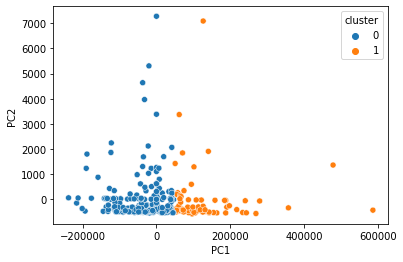

In [6]:
df , plot = kmeans(df_cluster, 2)
df.head()

In [7]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,cluster,cen_x,cen_y,PC1,PC2
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,0,61.088321,0.423077,1641.969404,-0.145907
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,0,61.088321,0.423077,1.766516,7279.254972
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,0,61.088321,0.423077,-101358.133290,-411.138653
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,0,61.088321,0.423077,-53358.143087,-457.772091
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,59.917954,0.461538,63641.865209,-437.190778


In [8]:
# Visualize cluster 1
df[df_cluster['cluster'] == 0]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,cluster,cen_x,cen_y,PC1,PC2
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,0,61.088321,0.423077,1641.969404,-0.145907
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,0,61.088321,0.423077,1.766516,7279.254972
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,0,61.088321,0.423077,-101358.133290,-411.138653
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,0,61.088321,0.423077,-53358.143087,-457.772091
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,0,61.088321,0.423077,-59358.158529,-520.368469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.00,1.4,139,1,0,258,0,61.088321,0.423077,-130358.087915,-230.295077
293,63.0,1,103,1,35,0,179000.00,0.9,136,1,1,270,0,61.088321,0.423077,-84358.141871,-458.472805
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,61.088321,0.423077,-108358.151303,-494.646423
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,61.088321,0.423077,6642.272279,1236.444798


In [9]:
# Visualize cluster 2 
df[df_cluster['cluster'] == 1]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,cluster,cen_x,cen_y,PC1,PC2
4,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1,59.917954,0.461538,63641.865209,-437.190778
7,60.0,1,315,1,60,0,454000.0,1.1,131,1,1,10,1,59.917954,0.461538,190641.899516,-313.030541
9,80.0,1,123,0,35,1,388000.0,9.4,133,1,1,10,1,59.917954,0.461538,124641.854521,-489.016595
10,75.0,1,81,0,38,1,368000.0,4.0,131,1,1,10,1,59.917954,0.461538,104641.844973,-526.159474
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,1,59.917954,0.461538,163641.843120,-541.449179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250,1,59.917954,0.461538,279641.963748,-67.800030
289,90.0,1,337,0,38,0,390000.0,0.9,144,0,0,256,1,59.917954,0.461538,126641.908454,-275.700974
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,1,59.917954,0.461538,118641.873258,-420.724158
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,1,59.917954,0.461538,478642.316897,1361.875604


In [17]:
def cluster_visualization(df):
    cluster_list = []
    n = df.cluster.unique()
    
    for i in n:
        cluster_list.append(df[df['cluster'] == i])
    return cluster_list
        

In [22]:
clusters = cluster_visualization(df_cluster)


In [25]:
clusters[0]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,cluster,cen_x,cen_y,PC1,PC2
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,0,61.088321,0.423077,1641.969404,-0.145907
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,0,61.088321,0.423077,1.766516,7279.254972
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,0,61.088321,0.423077,-101358.133290,-411.138653
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,0,61.088321,0.423077,-53358.143087,-457.772091
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,0,61.088321,0.423077,-59358.158529,-520.368469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60.0,0,320,0,35,0,133000.00,1.4,139,1,0,258,0,61.088321,0.423077,-130358.087915,-230.295077
293,63.0,1,103,1,35,0,179000.00,0.9,136,1,1,270,0,61.088321,0.423077,-84358.141871,-458.472805
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,61.088321,0.423077,-108358.151303,-494.646423
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,61.088321,0.423077,6642.272279,1236.444798
